# Intro

This notebook will be an attempt to perform Exploratory Data Analysis on the CT Kindey Dataset. I will try to find some meaningful information and come to interesting conclusions without stating clear questions at the start. 

Let's see what we can discover!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

# Structure of the database

Firstly, we should check structure of folders and what files we have.

In [2]:
os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/')

['kidneyData.csv', 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']

In [3]:
os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

['Cyst', 'Tumor', 'Stone', 'Normal']

Based on what we found we can arrange tree of items.

* ct-kidney-dataset-normal-cyst-tumor-and-stone/
    * kidneyData.csv
    * CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/
        * 'Cyst/', 
        * 'Tumor/', 
        * 'Stone/', 
        * 'Normal/'

In [4]:
path_main = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Cyst

Number of elements: 3709

First item's name: Cyst- (3178).jpg

***************************
Folder: Tumor

Number of elements: 2283

First item's name: Tumor- (1913).jpg

***************************
Folder: Stone

Number of elements: 1377

First item's name: Stone- (209).jpg

***************************
Folder: Normal

Number of elements: 5077

First item's name: Normal- (1381).jpg

***************************


As we can see we have *kidneyData.csv* and 4 folders containing photos in JPG format.

In [5]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [6]:
path_normal = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
path_stone = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
path_cyst = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
path_tumor = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'

# Look at the images

The next stage will be to see how the images in each folder actually look. 

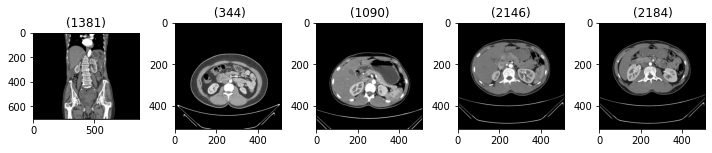

In [7]:
plot_imgs(path_normal, 5)

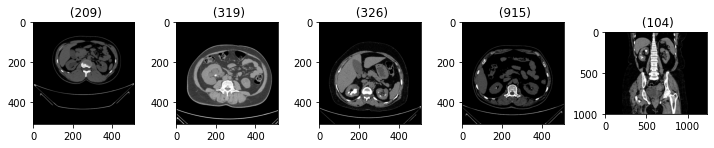

In [8]:
plot_imgs(path_stone, 5)

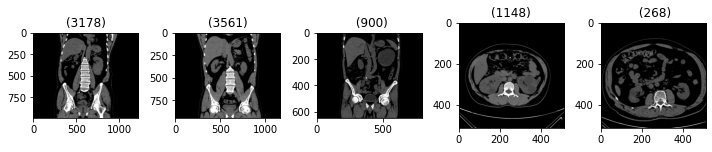

In [9]:
plot_imgs(path_cyst, 5)

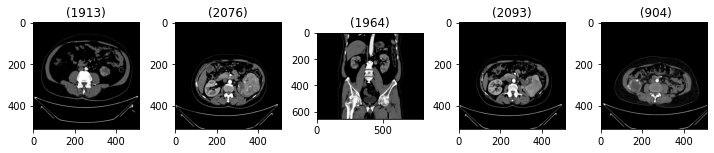

In [10]:
plot_imgs(path_tumor, 5)

# What we do we have in CSV file

Then we can see inside of the CSV file. 

In [11]:
data_kidney_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv'
df_kidney = pd.read_csv(data_kidney_path, header=0)

First 5 records

In [12]:
df_kidney.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


Last five records

In [13]:
df_kidney.tail()

,Unnamed: 0,image_id,path,diag,target,Class
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12445,12445,Cyst- (2145),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


Info about data inside

In [14]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [15]:
df_kidney['Class'].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

As we could suspect there are only four unique classes. 

In [16]:
kidney_classes = df_kidney['Class'].value_counts()

In [17]:
sum_of_element = kidney_classes.sum()

# Distribution of number of items in each class

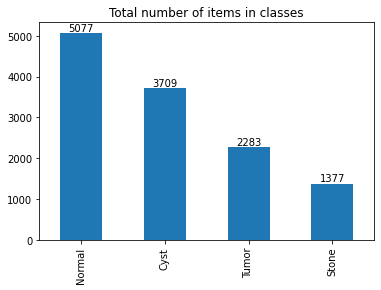

In [18]:
plot_bar = kidney_classes.plot.bar(title='Total number of items in classes')
plot_bar.bar_label(plot_bar.containers[0]);

We can see the most numerous class is *Normal*

# Shapes of the images

Displaying images we could notice there are a least two different shapes of them. Let's check how many actually there are.

In [19]:
def size_imgs(item_dir, num_imgs=5):
    all_item_dirs = os.listdir(item_dir)
    if num_imgs == -1:
        item_files = [os.path.join(item_dir, file) for file in all_item_dirs]
    else:
        item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]
    img_shape_list = []
    number_sizes = {}
    
    for idx, img_path in enumerate(item_files):
        img = plt.imread(img_path)
        img_shape_list.append(img.shape)
        
    unique = list(set(img_shape_list))
    
    for item in unique:
        number_sizes[item] = img_shape_list.count(item)
    
    return number_sizes

First we start with Normal class because it it the biggest one. Then we count other classes to see the difference. 

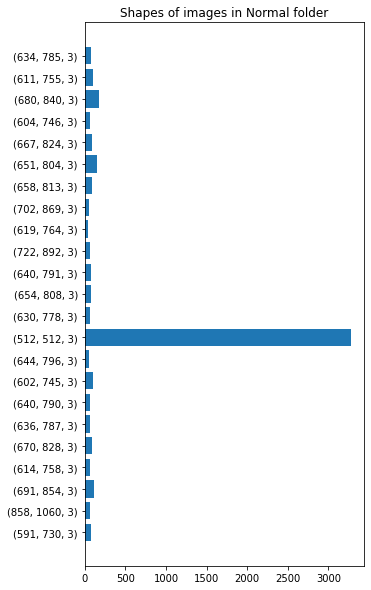

In [20]:
imgs_sizes_dict_normal = size_imgs(path_normal, num_imgs=-1)

elements_string_normal = list(map(str, imgs_sizes_dict_normal.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_normal, imgs_sizes_dict_normal.values());
plt.title('Shapes of images in Normal folder');

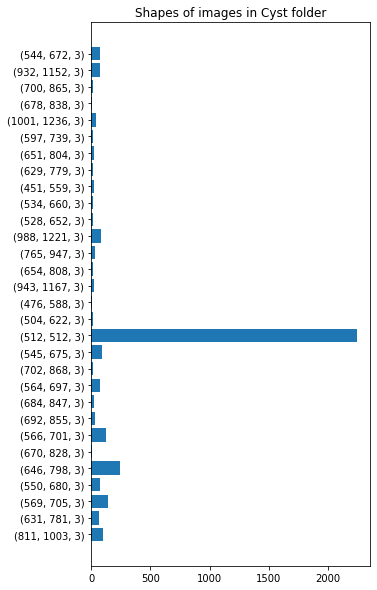

In [21]:
imgs_sizes_dict_cyst = size_imgs(path_cyst, num_imgs=-1)

elements_string_cyst = list(map(str, imgs_sizes_dict_cyst.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_cyst, imgs_sizes_dict_cyst.values());
plt.title('Shapes of images in Cyst folder');

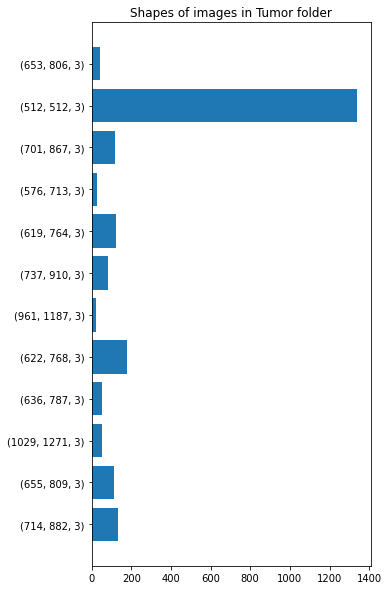

In [22]:
imgs_sizes_dict_tumor = size_imgs(path_tumor, num_imgs=-1)

elements_string_tumor = list(map(str, imgs_sizes_dict_tumor.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_tumor, imgs_sizes_dict_tumor.values());
plt.title('Shapes of images in Tumor folder');

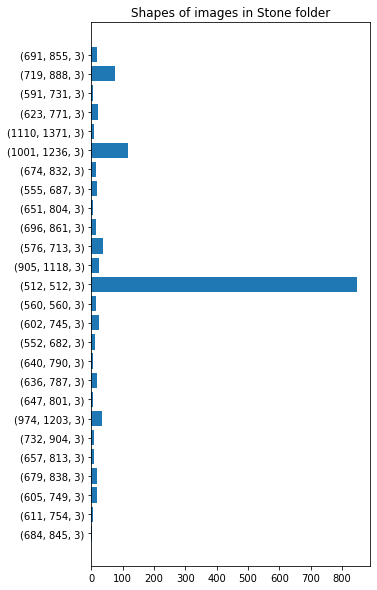

In [23]:
imgs_sizes_dict_stone = size_imgs(path_stone, num_imgs=-1)

elements_string_stone = list(map(str, imgs_sizes_dict_stone.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_stone, imgs_sizes_dict_stone.values());
plt.title('Shapes of images in Stone folder');

Based of the findings we can safely assume the biggest number of images have the shape (512, 512, 3). But unfortunetaly there is a lot of other smaller occurences of other shapes. We should find out how the numbers spread across all of the images. 

In [24]:
img_sizes_total = {**imgs_sizes_dict_normal, **imgs_sizes_dict_stone, **imgs_sizes_dict_tumor, **imgs_sizes_dict_cyst}

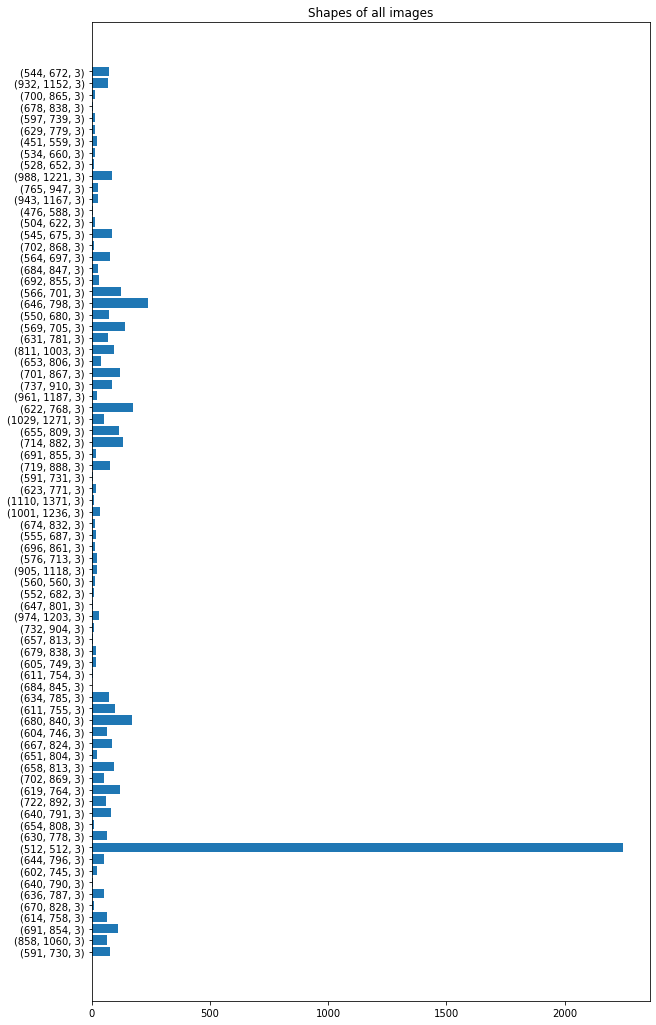

In [25]:
elements_string_total = list(map(str, img_sizes_total.keys()))

plt.figure(figsize=(10, 18))
plt.barh(elements_string_total, img_sizes_total.values());
plt.title('Shapes of all images');

In [26]:
img_sizes_total[(512, 512, 3)]

2247

In [27]:
print(f'{round(img_sizes_total[(512, 512, 3)]/sum_of_element,4)*100}%')

18.05%


As we could guess most of the images there are the ones with shape (512,512,3) - 2247 elements. Let's compare it with other shapes in the pie chart.

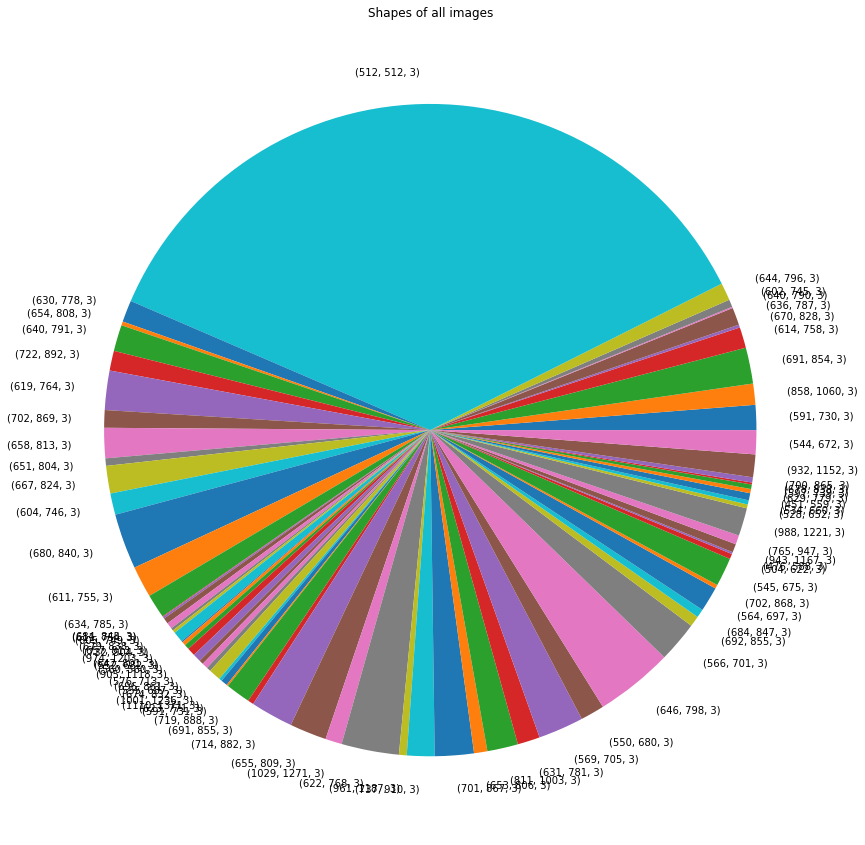

In [28]:
plt.figure(figsize=(15, 15))
plt.pie(img_sizes_total.values(), labels=elements_string_total);
plt.title('Shapes of all images');

In [29]:
print('Normal')
for element in [(512, 512, 3)]:
    if element in imgs_sizes_dict_normal.keys():
        print(f'{element}\n')
print('*******************\n')
print('Cyst\n')
for element in [(512, 512, 3)]:
    if element in imgs_sizes_dict_cyst.keys():
        print(f'{element}\n')
print('*******************\n')
print('Tumor\n') 
for element in [(512, 512, 3)]:
    if element in imgs_sizes_dict_tumor.keys():
        print(f'{element}\n')
print('*******************\n')
print('Stone\n')   
for element in [(512, 512, 3)]:
    if element in imgs_sizes_dict_stone.keys():
        print(f'{element}\n')

Normal
(512, 512, 3)

*******************

Cyst

(512, 512, 3)

*******************

Tumor

(512, 512, 3)

*******************

Stone

(512, 512, 3)



We see that the shape (512, 512, 3) can be found in every class. 

Now let's see how many images have shapes smaller than the most numerous one. 

In [30]:
list_bigger_than_first_512_img = [val for val in list(map(tuple, img_sizes_total.keys())) if val[0] < 512]

In [31]:
list_bigger_than_first_512_img

[(504, 622, 3), (476, 588, 3), (451, 559, 3)]

In [32]:
print(f"Total number of images in dataset: {sum_of_element}")
print(f"Total number of different shapes of images in dataset: {len(img_sizes_total)}")
for element in list_bigger_than_first_512_img:
    print(f'Shape: {element} - number of elements: {img_sizes_total[element]} - percentage of the dataset: {round(img_sizes_total[element]/sum_of_element,4)*100}%')

Total number of images in dataset: 12446
Total number of different shapes of images in dataset: 77
Shape: (504, 622, 3) - number of elements: 16 - percentage of the dataset: 0.13%
Shape: (476, 588, 3) - number of elements: 6 - percentage of the dataset: 0.05%
Shape: (451, 559, 3) - number of elements: 22 - percentage of the dataset: 0.18%


In [33]:
list_bigger_than_second_512_img = [val for val in list(map(tuple, img_sizes_total.keys())) if val[1] < 512]

In [34]:
list_bigger_than_second_512_img

[]

We found some images are smaller than (512, 512, 3) but there are a few of them so we could safely get rid of them. For safety we could find those files and see to which classes they belong.

In [35]:
print('Normal')
for element in [(504, 622, 3), (476, 588, 3), (451, 559, 3)]:
    if element in imgs_sizes_dict_normal.keys():
        print(f'{element}\n')
print('*******************\n')
print('Cyst\n')
for element in [(504, 622, 3), (476, 588, 3), (451, 559, 3)]:
    if element in imgs_sizes_dict_cyst.keys():
        print(f'{element}\n')
print('*******************\n')
print('Tumor\n') 
for element in [(504, 622, 3), (476, 588, 3), (451, 559, 3)]:
    if element in imgs_sizes_dict_tumor.keys():
        print(f'{element}\n')
print('*******************\n')
print('Stone\n')   
for element in [(504, 622, 3), (476, 588, 3), (451, 559, 3)]:
    if element in imgs_sizes_dict_stone.keys():
        print(f'{element}\n')

Normal
*******************

Cyst

(504, 622, 3)

(476, 588, 3)

(451, 559, 3)

*******************

Tumor

*******************

Stone



As we can see the smaller images are only in Cyst class. 

# Conclusion

We analysed content of the *CT KIDNEY DATASET* - CSV file as welle as all folders with images. The images are divided into 4 classes - Normal, Tumor, Cyst, Stone. Unfortunetaly they are not even. The Normal class is the biggest and is roughly the size of the rest classes together. 
We also studied shapes of images in those classes and found most of the elements of the dataset to have **(512, 512, 3)** shape - 2247 elements (18.05% of the dataset). 
Then we found that shapes smaller than the (512, 512, 3): 
* (504, 622, 3)
* (476, 588, 3)
* (451, 559, 3)

are only in Cyst class and there is a few of them. So we could get rid of them so the shape (512, 512, 3) could be the smallest and we could size down all other imagest to it. 
